# Pasos para el ETL
---
### Importar las Librerias

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
print('Se han importado todas las librerias')

Se han importado todas las librerias


In [2]:
'''Se creo la funcion para extraer el valor numerico df_edex'''
def extract_price(text):
    match = re.search(r'\$(\d+)', text)
    if match:
        value = int(match.group(1))
        return value
    return None


def extract_weeks(text):
    match = re.search(r'(\d+) Weeks', text)
    if text.find('Weeks'):
        if match:
            value = int(match.group(1)) 
            return value
        return None

### Cargar los Datasets y convertirlos en DataFrame

In [3]:
df_coursera_c =  pd.read_csv('Coursera_courses.csv')
df_coursera_r =  pd.read_csv('Coursera_reviews.csv')
df_edex =  pd.read_csv('edx_courses.csv')
df_udemy =  pd.read_csv('udemy_courses.csv')
print('Se han cargado todos los datasets')

Se han cargado todos los datasets


### Exploramos los registros del dataset 

In [4]:
df_coursera_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [5]:
df_coursera_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [6]:
df_edex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [7]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [8]:
df_coursera_c.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [9]:
df_coursera_r.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [10]:
df_edex.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [11]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


#### ELiminar duplicados

In [12]:
df_coursera_c.drop_duplicates(inplace=True)
df_coursera_r.drop_duplicates(inplace=True)
df_edex.drop_duplicates(inplace=True)
df_udemy.drop_duplicates(inplace=True)
print('se eliminaron los duplicados')

se eliminaron los duplicados


#### Extraer informacion importante de las columnas

In [13]:
#COURSERA
# Extraer el anio de la columna 'date_reviews'
df_coursera_r['date_reviews'] = pd.to_datetime(df_coursera_r['date_reviews'], format='%b %d, %Y')
df_coursera_r.insert(3, 'year_reviews', df_coursera_r['date_reviews'].dt.year)

#EDEX
#Extraer el precio de la columna price de EDEX
df_edex.insert(13, 'price_certificate', df_edex['price'].apply(extract_price))
#Extraer el numero de semanasa de la columna 'course_length' de EDEX
df_edex.insert(12, 'course_weeks', df_edex['course_length'].apply(extract_weeks))
#Convertir la columna 'n_enrolled' en tipo numerico
df_edex['n_enrolled']=df_edex['n_enrolled'].apply(lambda x: int(x.replace(',','')) if type(x) == str else x)

# UDEMY
# Extraer el anio de la columna 'published_timestamp'
df_udemy['published_timestamp'] = pd.to_datetime(df_udemy['published_timestamp'])
df_udemy['year'] = df_udemy['published_timestamp'].dt.year


#### ELiminar columnas que no son de utilidad para el analisis

In [14]:
df_coursera_c.drop( ['course_url'],axis= 1, inplace = True)
df_coursera_r.drop( ['date_reviews','reviews'],axis= 1, inplace = True)
df_edex.drop( ['course_url','price','course_length','course_description','course_syllabus','summary'],axis= 1, inplace = True)
df_udemy.drop( ['url','published_timestamp'],axis= 1, inplace = True)

#### CAntidad de cliente por plataforma

In [15]:
# Calculo promedio de la plataforma Edex
sum_edex = df_edex['n_enrolled'].sum() 
mean_edex = sum_edex/(len(df_edex['n_enrolled']) - df_edex['n_enrolled'].isnull().sum())

# Calculo promedio de la plataforma Udemy
sum_udemy = df_udemy['num_subscribers'].sum() 
mean_udemy = sum_udemy/len(df_udemy['num_subscribers'])

In [34]:
print('La plataforma Coursera tiene: ',len(df_coursera_r.reviewers.unique()), 'clientes que realizaron los comentarios')
print('La plataforma Edex tiene: ',sum_edex, ' personas matriculadas en los cursos,\n su promemdio es de', mean_edex)
print('La plataforma Udemy tiene: ',sum_udemy, 'personas matriculadas en los cursos,\n su promemdio es de', mean_udemy)


La plataforma Coursera tiene:  287808 clientes que realizaron los comentarios
La plataforma Edex tiene:  45440309.0  personas matriculadas en los cursos,
 su promemdio es de 53208.79274004684
La plataforma Udemy tiene:  11715835 personas matriculadas en los cursos,
 su promemdio es de 3190.586873638344


## Visualizacion
---
### Niveles de Dificultad
#### Edex

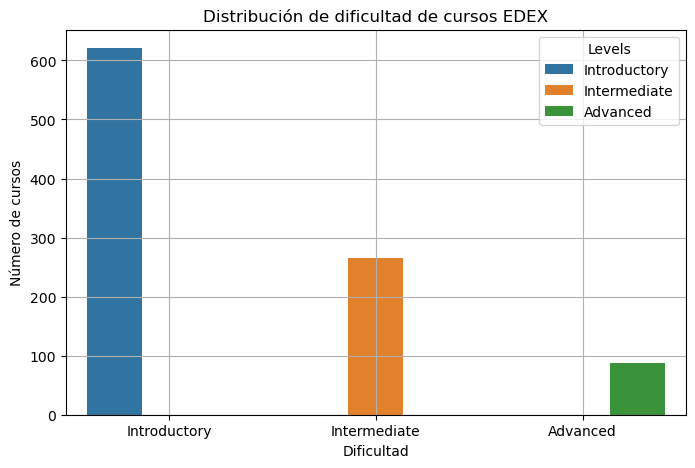

In [18]:
fig_dims = (8,5)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Level',data = df_edex,ax=ax, hue= 'Level')
ax.set_xticklabels(['Introductory', 'Intermediate', 'Advanced'])
ax.set_title('Distribución de dificultad de cursos EDEX')
ax.set_xlabel('Dificultad')
ax.set_ylabel('Número de cursos')
ax.legend(title='Levels')
plt.grid()

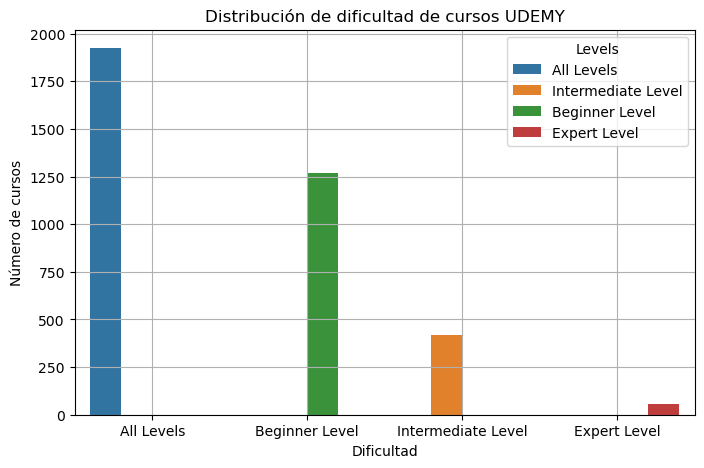

In [19]:
fig_dims = (8,5)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='level',data = df_udemy,ax=ax, hue= 'level', order=['All Levels','Beginner Level','Intermediate Level','Expert Level'])
ax.set_title('Distribución de dificultad de cursos UDEMY')
ax.legend(title='Levels')
ax.set_xlabel('Dificultad')
ax.set_ylabel('Número de cursos')
plt.grid()

In [42]:
pagos = df_edex['price_certificate'].unique()
pagos

array([ 49,  90, 199, 249,   5,  99,  39, 399, 149, 125,  40,  25,  50,
       169,  70,  79, 150,  69, 200, 225,  75, 300, 139, 350,  19, 100,
       450, 119,  60, 299,  29,  65,  15, 214,  10, 129,  59, 179, 250,
       159, 375, 166,  30])

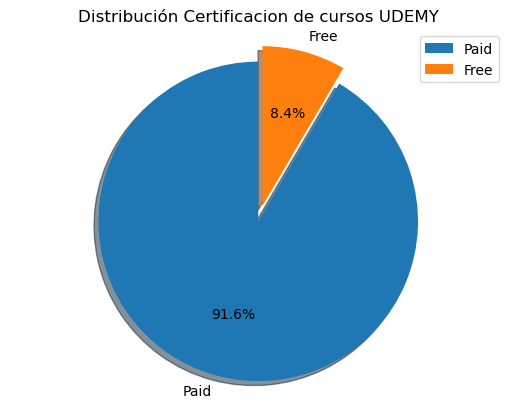

In [40]:
labels = 'Paid', 'Free'
sizes = [91.55, 8.45]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Paid')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribución Certificacion de cursos UDEMY')
ax1.legend()
plt.show()

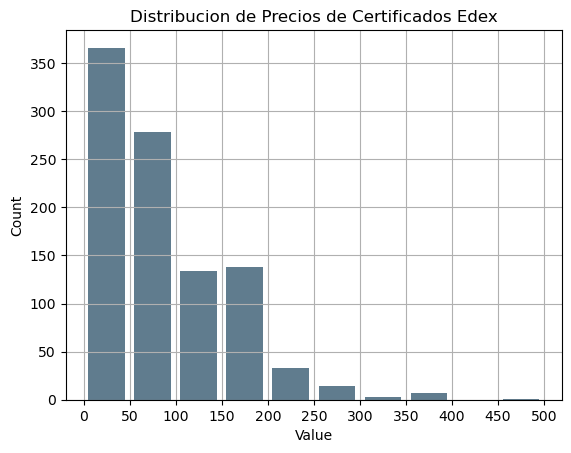

In [49]:

values = df_edex['price_certificate']

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

plt.hist(values, bins=bins, rwidth=0.8, color='#607c8e')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribucion de Precios de Certificados Edex')
plt.xticks(bins)
plt.grid()
plt.show()

## Generando Wordcloud
---
Coursera

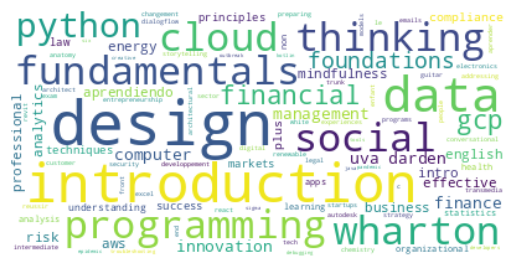

In [27]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df_coursera_c.sample(100).course_id))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Edex

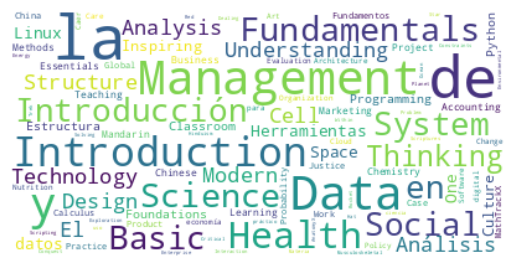

In [30]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df_edex.sample(100).title))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Udemy

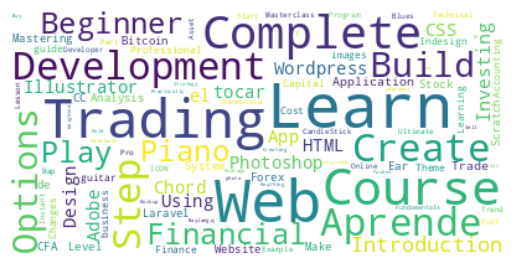

In [32]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df_udemy.sample(100).course_title))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()